In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
relationship_df = pd.read_csv('relation_tweet.csv')

In [5]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "from", 
                            target = "to", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

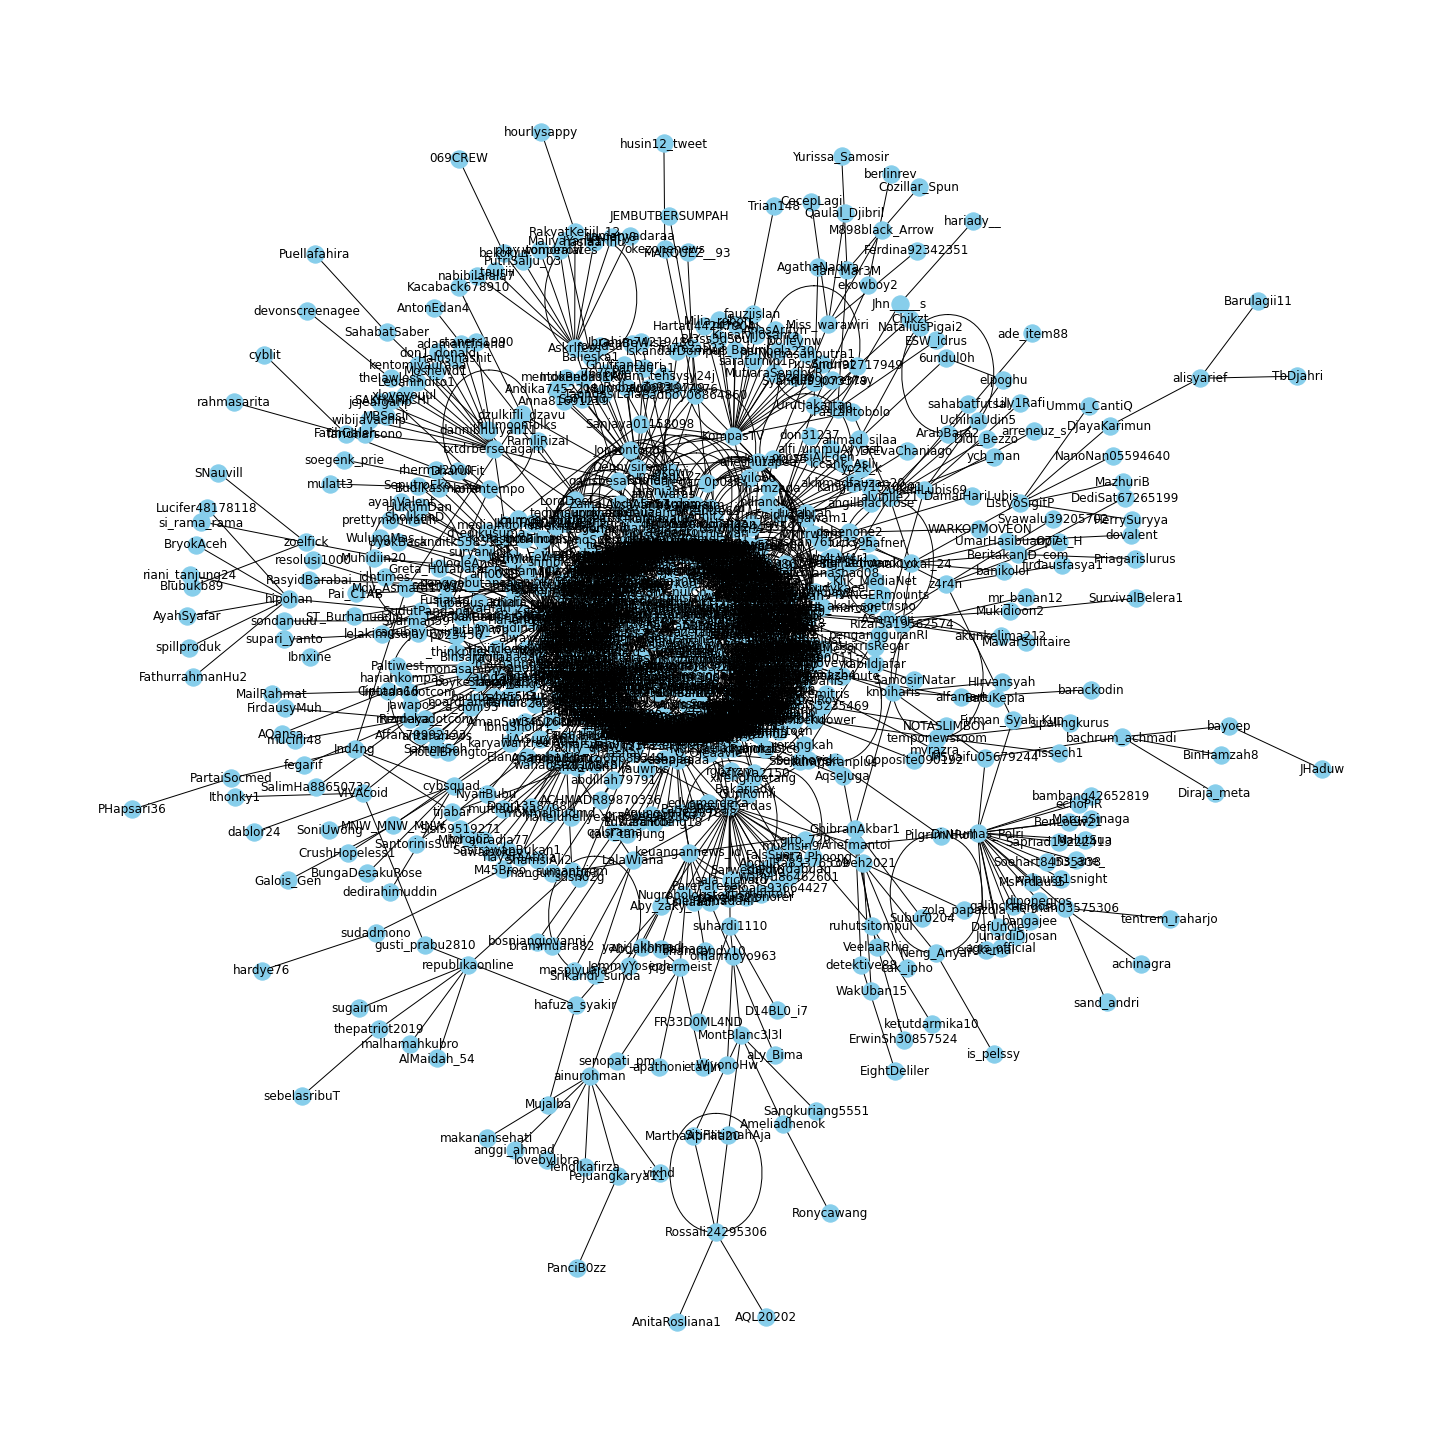

In [6]:
plt.figure(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [10]:
dict(G.degree)

{'Haji_Bajuri': 1,
 'KompasTV': 27,
 'Aby_zaky_': 2,
 'OposisiCerdas': 27,
 'saddw_': 1,
 'sksnprk': 1,
 'Rawit234234': 7,
 'susno2g': 1,
 'linajobstreett': 1,
 'syphayoaku': 1,
 'SmgMenfess2': 3,
 'dianiiiyy': 1,
 'JHaduw': 1,
 'bayoep': 2,
 'dhimasbagus13': 1,
 'hellodeka': 4,
 'bachrum_achmadi': 4,
 'Riznan_13': 1,
 'txtdaribandung': 1,
 'Abah_Reborn': 1,
 'aisyahf69386234': 1,
 'bdngfess': 1,
 'i_ervans': 2,
 'anaksemute': 1,
 'tvindonesiawkwk': 3,
 'Johny_twee': 2,
 '_ekokuntadhi': 13,
 'uang_kripto': 2,
 'sipalingkurus': 1,
 'temponewsroom': 5,
 'Ferdysambo1': 26,
 'regar_0p0sisi': 3,
 'Hanapuyyy': 2,
 'berpikirq': 1,
 'budimandjatmiko': 1,
 'LKSMDR': 1,
 'agelmeip': 3,
 'Sariqoem': 1,
 'geloraco': 27,
 'Jonsontonga': 2,
 'Lily1Rafi': 1,
 'ZulkifliLubis69': 5,
 'M45Broo_': 2,
 'sudadmono': 2,
 'berlinrev': 1,
 'ekowboy2': 2,
 'Askrlfess': 11,
 'bekokjin': 2,
 'papa_loren': 1,
 'salsaaii': 4,
 'SulisWidjaya': 1,
 'DivHumas_Polri': 21,
 'Soehart84535338': 1,
 'LstwnA': 1,
 '991Jaka

In [7]:
from pyvis.network import Network
net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('Sambo.html')

In [11]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Haji_Bajuri': 0.0007535795026375283,
 'KompasTV': 0.020346646571213264,
 'Aby_zaky_': 0.0015071590052750565,
 'OposisiCerdas': 0.020346646571213264,
 'saddw_': 0.0007535795026375283,
 'sksnprk': 0.0007535795026375283,
 'Rawit234234': 0.005275056518462698,
 'susno2g': 0.0007535795026375283,
 'linajobstreett': 0.0007535795026375283,
 'syphayoaku': 0.0007535795026375283,
 'SmgMenfess2': 0.002260738507912585,
 'dianiiiyy': 0.0007535795026375283,
 'JHaduw': 0.0007535795026375283,
 'bayoep': 0.0015071590052750565,
 'dhimasbagus13': 0.0007535795026375283,
 'hellodeka': 0.003014318010550113,
 'bachrum_achmadi': 0.003014318010550113,
 'Riznan_13': 0.0007535795026375283,
 'txtdaribandung': 0.0007535795026375283,
 'Abah_Reborn': 0.0007535795026375283,
 'aisyahf69386234': 0.0007535795026375283,
 'bdngfess': 0.0007535795026375283,
 'i_ervans': 0.0015071590052750565,
 'anaksemute': 0.0007535795026375283,
 'tvindonesiawkwk': 0.002260738507912585,
 'Johny_twee': 0.0015071590052750565,
 '_ekokuntadhi

<AxesSubplot:>

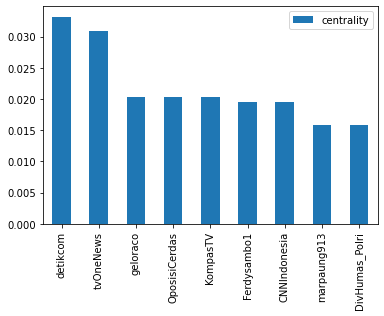

In [12]:
#centrality
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])

#plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[:9].plot(kind='bar')

<AxesSubplot:>

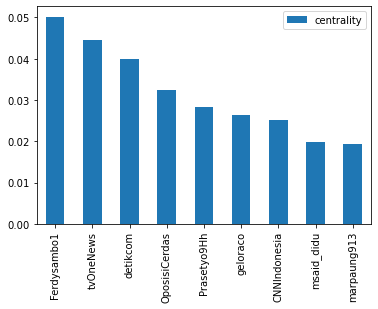

In [13]:
#betwenness centrality
betwennes_dict = nx.betweenness_centrality(G)
degree_df = pd.DataFrame.from_dict(betwennes_dict, orient='index', columns=['centrality'])

#plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[:9].plot(kind='bar')

<AxesSubplot:>

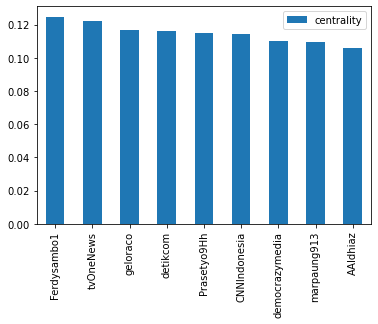

In [14]:
#closeness centrality
closeness_dict = nx.closeness_centrality(G)
degree_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])

#plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[:9].plot(kind='bar')

In [15]:
#Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betwennes_dict, 'betwennes_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [17]:
import community.community_louvain as community_louvain

In [18]:
communities = community_louvain.best_partition(G)

In [19]:
nx.set_node_attributes(G, communities, 'group')

In [20]:
com_net = Network(notebook=True, width='1000px', height='700px', bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show('sambo_communities.html')